In [73]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from matplotlib import pyplot as plt
%matplotlib inline

In [74]:
df=pd.read_csv('houseprices_banglore.csv')
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [75]:
sx=preprocessing.MinMaxScaler()
sy=preprocessing.MinMaxScaler()

scaled_X=sx.fit_transform(df.drop('price', axis='columns'))
scaled_X
scaled_y=sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [76]:
def batch_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    
    number_of_features=X.shape[1]
    
    w=np.ones(shape=(number_of_features))
    b=0
    total_samples=X.shape[0]
    cost_list=[]
    epoch_list=[]
    
    
    for i in range(epochs):
        y_predicted= np.dot(w,scaled_X.T)+b
        
        w_grad=-(2/total_samples)*(X.T.dot(y_true-y_predicted))
        bias=-(2/total_samples)*np.sum(y_true-y_predicted)
        
        w=w-learning_rate*w_grad
        b=b-learning_rate*bias
        
        cost=np.mean(np.square(y_true-y_predicted))
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w,b,cost,cost_list,epoch_list

w,b,cost,cost_list,epoch_list=batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)
w,b,cost
            
    
    

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

In [77]:
w=np.ones(shape=(2))
w

    

array([1., 1.])

In [78]:
w.shape

(2,)

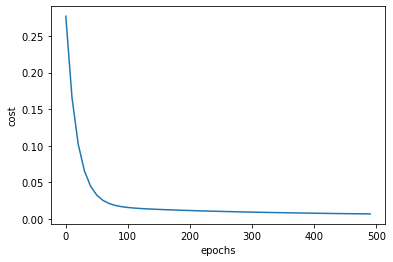

In [79]:
plt.xlabel("epochs")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [80]:
def predict(area,bedroom,w,b):
    
    scaled_X=sx.transform([[area,bedroom]])[0]
    scaled_price=w[0]*scaled_X[0]+w[1]*scaled_X[1]+b
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

185.9460459064258

In [81]:
import random

In [83]:
def stochaistic_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    
    
    number_of_features=X.shape[1]
    
    w=np.ones(shape=(number_of_features))
    b=0
    total_samples=X.shape[0]
    cost_list=[]
    epoch_list=[]
    
    for i in range (epochs):
        
        random_index=random.randint(0,total_samples-1)
        sample_X=X[random_index]
        sample_y=y_true[random_index]
        
        y_predicted= np.dot(w,sample_X.T)+b
        
        w_grad=-(2/total_samples)*(sample_X.T.dot(sample_y-y_predicted))
        bias=-(2/total_samples)*(sample_y-y_predicted)
        
        w=w-learning_rate*w_grad
        b=b-learning_rate*bias
        
        cost=np.mean(np.square(sample_y-y_predicted))
        
        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w,b,cost,cost_list,epoch_list

w_sgd,b_sgd,cost_sgd,cost_list_sgd,epoch_list_sgd=stochaistic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd,b_sgd,cost_sgd  

(array([0.70308099, 0.67072258]), -0.22489478644572009, 0.00027064920093432943)

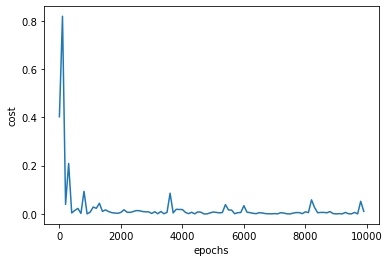

In [87]:
plt.xlabel("epochs")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [109]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from matplotlib import pyplot as plt
%matplotlib inline
import random

In [110]:
df=pd.read_csv('houseprices_banglore.csv')
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [127]:
sx=preprocessing.MinMaxScaler()
scaled_X=sx.fit_transform(df.drop('price',axis='columns'))
sy=preprocessing.MinMaxScaler()
scaled_y=sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_X.shape

(20, 2)

In [133]:
def mini_batch_gradient_descent(X, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):
    
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples
        
    cost_list = []
    epoch_list = []
    
    num_batches = int(total_samples/batch_size)
    
    for i in range(epochs):    
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]
        
        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            
            yj = y_tmp[j:j+batch_size]
            y_predicted = np.dot(w, Xj.T) + b
            
            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)
            
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
            cost = np.mean(np.square(yj-y_predicted)) # MSE (Mean Squared Error)
            
            if (i==0&j==0):
                print(Xj)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(
    scaled_X,
    scaled_y.reshape(scaled_y.shape[0],),
    epochs = 120,
    batch_size = 5
)
w, b, cost
                

[[0.68448276 0.75      ]
 [0.         0.        ]
 [0.17586207 0.5       ]
 [0.67931034 0.5       ]
 [0.22068966 0.5       ]]
[[1.         1.        ]
 [0.13793103 0.25      ]
 [0.13103448 0.5       ]
 [0.5        0.5       ]
 [0.12758621 0.25      ]]
[[0.34482759 0.5       ]
 [0.24862069 0.5       ]
 [0.86206897 0.75      ]
 [0.10344828 0.25      ]
 [0.25517241 0.5       ]]
[[0.12931034 0.25      ]
 [0.06896552 0.25      ]
 [0.6662069  0.75      ]
 [0.08827586 0.25      ]
 [0.62068966 0.75      ]]


(array([0.71006724, 0.67808067]), -0.23344975819355496, 0.012622461993855963)

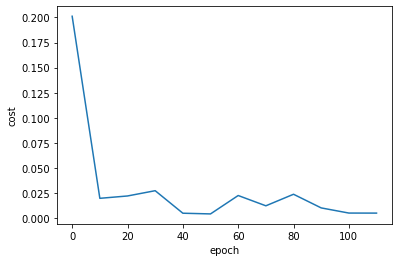

In [134]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [123]:
total_samples=10
random_indices = np.random.permutation(total_samples)
random_indices

array([9, 7, 6, 0, 2, 1, 8, 5, 3, 4])